## <font color='red'>时间序列如何进行窗口统计？</font>

In [1]:
import pandas as pd

# 创建一个示例时间序列
data = {'date': pd.date_range('2023-01-01', '2023-01-10'),
        'value': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]}
df = pd.DataFrame(data)
df.set_index('date', inplace=True)
df

,value
date,
2023-01-01,10
2023-01-02,15
2023-01-03,20
2023-01-04,25
2023-01-05,30
2023-01-06,35
2023-01-07,40
2023-01-08,45
2023-01-09,50


In [6]:
window_size = 3
rolling_mean = df['value'].rolling(window=window_size).mean()
rolling_mean

date
2023-01-01     NaN
2023-01-02     NaN
2023-01-03    15.0
2023-01-04    20.0
2023-01-05    25.0
2023-01-06    30.0
2023-01-07    35.0
2023-01-08    40.0
2023-01-09    45.0
2023-01-10    50.0
Name: value, dtype: float64

In [7]:
df['近3个月均值'] = rolling_mean
df

,value,近3个月均值
date,,
2023-01-01,10,NaN
2023-01-02,15,NaN
2023-01-03,20,15.0
2023-01-04,25,20.0
2023-01-05,30,25.0
2023-01-06,35,30.0
2023-01-07,40,35.0
2023-01-08,45,40.0
2023-01-09,50,45.0


## <font color='red'>时间序列自定义函数窗口统计？</font>

In [38]:
import pandas as pd

# 生成测试数据
data = pd.DataFrame({'value': np.random.randn(365).cumsum()},
                    index=pd.date_range('2021-01-01',periods=365))
display(data)

,value
2021-01-01,0.148323
2021-01-02,0.209064
2021-01-03,-2.966623
2021-01-04,-3.121997
2021-01-05,-2.318795
...,...
2021-12-27,-17.563575
2021-12-28,-16.974585
2021-12-29,-17.248052
2021-12-30,-17.970379


In [44]:
# 自定义窗口函数计算z-score
def z_score(window):
#     display('------------------------',window)
    zscore = (window - window.mean())/window.std()
    return zscore.iloc[-1]

In [45]:
# 7天窗口计算z-score  
data['zscore'] = data.value.rolling(7).apply(z_score)
display(data)

,value,zscore
2021-01-01,0.148323,NaN
2021-01-02,0.209064,NaN
2021-01-03,-2.966623,NaN
2021-01-04,-3.121997,NaN
2021-01-05,-2.318795,NaN
...,...,...
2021-12-27,-17.563575,0.925104
2021-12-28,-16.974585,1.000911
2021-12-29,-17.248052,0.594642
2021-12-30,-17.970379,-0.756331


In [46]:
# 标记绝对值大于2的异常数据
anomalies = data[np.abs(data.zscore) > 2]
display(anomalies)

,value,zscore
2021-02-22,3.614751,2.073513
2021-06-16,-22.867143,2.040813
2021-06-28,-28.796769,-2.060794
2021-09-13,-20.346711,2.035629
2021-10-22,-12.543094,-2.035547


## <font color='red'>时间序列如何进行周期性分析？</font>

### 数据创建

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建示例数据
np.random.seed(0)
days = pd.date_range('2020-01-01', freq='D',periods=365)
f = 6
t = np.linspace(0,1,len(days))
sales = np.sin(2 * np.pi * f * t)+ np.random.randn(len(days)) * 0.2

data = {'day': days,
        'sales': sales}
df = pd.DataFrame(data)
df.set_index('day', inplace=True)
df

,sales
day,
2020-01-01,0.352810
2020-01-02,0.183415
2020-01-03,0.401407
2020-01-04,0.753910
2020-01-05,0.776039
...,...
2020-12-26,-0.262836
2020-12-27,-0.304978
2020-12-28,-0.019290


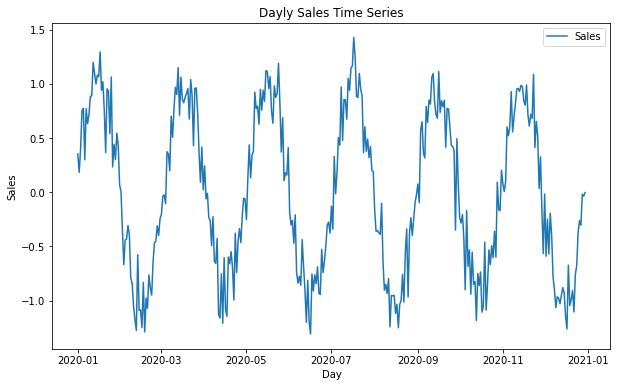

In [145]:
# 绘制销售数据的时间序列图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sales'], label='Sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Dayly Sales Time Series')
plt.legend()
plt.show()

In [141]:
t

array([0.        , 0.00274725, 0.00549451, 0.00824176, 0.01098901,
       0.01373626, 0.01648352, 0.01923077, 0.02197802, 0.02472527,
       0.02747253, 0.03021978, 0.03296703, 0.03571429, 0.03846154,
       0.04120879, 0.04395604, 0.0467033 , 0.04945055, 0.0521978 ,
       0.05494505, 0.05769231, 0.06043956, 0.06318681, 0.06593407,
       0.06868132, 0.07142857, 0.07417582, 0.07692308, 0.07967033,
       0.08241758, 0.08516484, 0.08791209, 0.09065934, 0.09340659,
       0.09615385, 0.0989011 , 0.10164835, 0.1043956 , 0.10714286,
       0.10989011, 0.11263736, 0.11538462, 0.11813187, 0.12087912,
       0.12362637, 0.12637363, 0.12912088, 0.13186813, 0.13461538,
       0.13736264, 0.14010989, 0.14285714, 0.1456044 , 0.14835165,
       0.1510989 , 0.15384615, 0.15659341, 0.15934066, 0.16208791,
       0.16483516, 0.16758242, 0.17032967, 0.17307692, 0.17582418,
       0.17857143, 0.18131868, 0.18406593, 0.18681319, 0.18956044,
       0.19230769, 0.19505495, 0.1978022 , 0.20054945, 0.20329

5.983561643835617


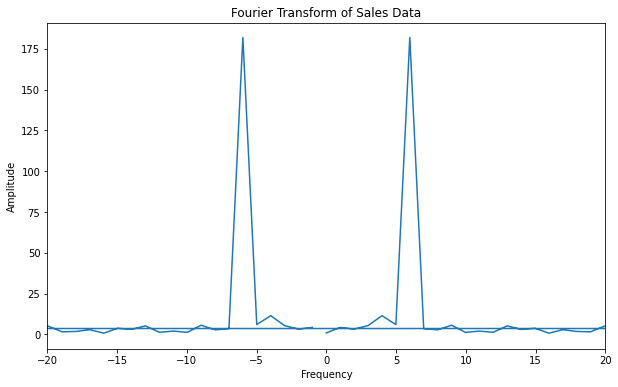

In [153]:
# 傅里叶变换
fft_values = np.fft.fft(df['sales']) # 振幅，纵坐标，复数
fft_freqs = np.fft.fftfreq(len(df), d=t[1] - t[0]) # 频率，横坐标

# 计算就是峰值，频率的峰值
fft = np.abs(fft_values) # 复数，实数 + 虚数
fft = fft[fft_freqs > 0]
peak_freq = fft_freqs[fft_freqs > 0][np.argmax(fft)]
print(peak_freq) # 6.0,匹配我们设定的f

# 下面：画图
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs, np.abs(fft_values)) #求绝对值！
plt.xlim(-20,20)
plt.xlabel('Frequency') # 频率
plt.ylabel('Amplitude') # 振幅
plt.title('Fourier Transform of Sales Data') # 傅里叶变换
plt.show()

In [154]:
12/6

2.0

## <font color='red'>时间序列扩展窗口累计指标计算？</font>

In [8]:
import pandas as pd
price = [10, 11, 9, 13, 12, 13, 15]
ts = pd.Series(price,index = pd.date_range('2023-01-01',periods= len(price)))
df = ts.to_frame(name = '价格')
df

,价格
2023-01-01,10
2023-01-02,11
2023-01-03,9
2023-01-04,13
2023-01-05,12
2023-01-06,13
2023-01-07,15


In [9]:
df.cumsum()

,价格
2023-01-01,10
2023-01-02,21
2023-01-03,30
2023-01-04,43
2023-01-05,55
2023-01-06,68
2023-01-07,83


In [10]:
df.expanding().sum()

,价格
2023-01-01,10.0
2023-01-02,21.0
2023-01-03,30.0
2023-01-04,43.0
2023-01-05,55.0
2023-01-06,68.0
2023-01-07,83.0


In [11]:
df.expanding().mean()

,价格
2023-01-01,10.000000
2023-01-02,10.500000
2023-01-03,10.000000
2023-01-04,10.750000
2023-01-05,11.000000
2023-01-06,11.333333
2023-01-07,11.857143


In [12]:
df.expanding().max()

,价格
2023-01-01,10.0
2023-01-02,11.0
2023-01-03,11.0
2023-01-04,13.0
2023-01-05,13.0
2023-01-06,13.0
2023-01-07,15.0


## <font color='red'>时间序列扩展窗口高级使用？</font>

In [51]:
import pandas as pd
import numpy as np

# 创造数据（每日销售数据）
data = {'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'Value': [10, 15, 12, 20, 18, 22, 25, 23, 30, 28]}
df = pd.DataFrame(data)

# 计算移动统计数据
window_size = 3
df['窗口移动平均值'] = df['Value'].rolling(window=window_size).mean().round(2)
df['累计移动平均值'] = df['Value'].expanding(1).mean().round(2)
df

,Date,Value,窗口移动平均值,累计移动平均值
0,2023-01-01,10,NaN,10.00
1,2023-01-02,15,NaN,12.50
2,2023-01-03,12,12.33,12.33
3,2023-01-04,20,15.67,14.25
4,2023-01-05,18,16.67,15.00
5,2023-01-06,22,20.00,16.17
6,2023-01-07,25,21.67,17.43
7,2023-01-08,23,23.33,18.12
8,2023-01-09,30,26.00,19.44
9,2023-01-10,28,27.00,20.30


In [52]:
# 扩展窗口计算指数加权移动平均（EWMA）
def ewma_calc(series):
    decay = 0.5  # 指数衰减因子
    weights = (1 - decay) ** np.arange(len(series), 0, -1)
    ewma = (series * weights).sum() / weights.sum() # 归一化
    return round(ewma,2)
df['指数加权移动平均'] = df['Value'].expanding().apply(ewma_calc)
df

,Date,Value,窗口移动平均值,累计移动平均值,指数加权移动平均
0,2023-01-01,10,NaN,10.00,10.00
1,2023-01-02,15,NaN,12.50,13.33
2,2023-01-03,12,12.33,12.33,12.57
3,2023-01-04,20,15.67,14.25,16.53
4,2023-01-05,18,16.67,15.00,17.29
5,2023-01-06,22,20.00,16.17,19.68
6,2023-01-07,25,21.67,17.43,22.36
7,2023-01-08,23,23.33,18.12,22.68
8,2023-01-09,30,26.00,19.44,26.35
9,2023-01-10,28,27.00,20.30,27.17


In [54]:
decay = 0.5  # 指数衰减因子
weights = (1 - decay) ** np.arange(10, 0, -1)
weights

array([0.00097656, 0.00195312, 0.00390625, 0.0078125 , 0.015625  ,
       0.03125   , 0.0625    , 0.125     , 0.25      , 0.5       ])

## <font color='red'>DataFrame邮箱如何提取域名？</font>

In [56]:
import pandas as pd

# 创建一个包含电子邮件地址的DataFrame
data = {'Email': ['user1@example.com', 'user2@gmail.com', 'user3@yahoo.com', 'user4@hotmail.com']}
df = pd.DataFrame(data)

df

,Email
0,user1@example.com
1,user2@gmail.com
2,user3@yahoo.com
3,user4@hotmail.com


In [57]:
# 提取域名部分
df['Domain'] = df['Email'].str.split('@').str.get(1)

df

,Email,Domain
0,user1@example.com,example.com
1,user2@gmail.com,gmail.com
2,user3@yahoo.com,yahoo.com
3,user4@hotmail.com,hotmail.com


In [58]:
df['Email'].str.split('@')

0    [user1, example.com]
1      [user2, gmail.com]
2      [user3, yahoo.com]
3    [user4, hotmail.com]
Name: Email, dtype: object

In [59]:
df['Email'].str.split('@').str.get(1)

0    example.com
1      gmail.com
2      yahoo.com
3    hotmail.com
Name: Email, dtype: object

In [60]:
s = 'user1@example.com'
s

'user1@example.com'

In [64]:
s.split('@')[1]

'example.com'

通过这种方式，查看函数和方法  
pd.Series.str.get()

In [ ]:
pd.Series.str.repeat

In [77]:
df['Email'].str.repeat(2)

0    user1@example.comuser1@example.com
1        user2@gmail.comuser2@gmail.com
2        user3@yahoo.comuser3@yahoo.com
3    user4@hotmail.comuser4@hotmail.com
Name: Email, dtype: object

In [73]:
s = pd.Series(["String",
...               (1, 2, 3),
...               ["a", "b", "c"],
...               123,
...               -456,
...               {1: "Hello", 2: "World"}])

In [74]:
s

0                      String
1                   (1, 2, 3)
2                   [a, b, c]
3                         123
4                        -456
5    {1: 'Hello', 2: 'World'}
dtype: object

In [75]:
s.str.get(2)

0        r
1        3
2        c
3      NaN
4      NaN
5    World
dtype: object

In [70]:
d = {1: 'Hello', '2': 'World'}
d

{1: 'Hello', '2': 'World'}

In [72]:
d[1]

'Hello'

## <font color='red'>pandas字符串更多操作有哪些？</font>

In [80]:
import pandas as pd

# 创建学生数据
data = {'name': [' John ', 'mary ', 'tom', 'Ada wong'], 
        'gender': ['m', 'f', 'm', 'f'],
        'score': [88, 90, 95, 92]}
students = pd.DataFrame(data)
display(students)
print(students.iloc[0,0])

,name,gender,score
0,John,m,88
1,mary,f,90
2,tom,m,95
3,Ada wong,f,92


 John 


In [ ]:
pd.Series.str.strip()

In [81]:
# 名字列转换为大写并去空格
students['name'] = students['name'].str.upper().str.strip()
display(students)
print(students.iloc[0,0])

,name,gender,score
0,JOHN,m,88
1,MARY,f,90
2,TOM,m,95
3,ADA WONG,f,92


JOHN


In [ ]:
pd.Series.str.replace()

In [84]:
pd.Series(['foo', 'fuz', np.nan])

0    foo
1    fuz
2    NaN
dtype: object

In [87]:
pd.Series(['foo', 'fuz', np.nan,'f.z']).str.replace('f.', 'ba', regex=False)

0    foo
1    fuz
2    NaN
3    baz
dtype: object

In [82]:
# 性别列将f替换为female, m替换为male
students['gender'] = students['gender'].replace({'f': 'female', 'm': 'male'})
students

,name,gender,score
0,JOHN,male,88
1,MARY,female,90
2,TOM,male,95
3,ADA WONG,female,92


In [83]:
# 成绩大于90的标记为excellent
students.loc[students['score'] > 90, 'level'] = 'excellent'

students

,name,gender,score,level
0,JOHN,male,88,NaN
1,MARY,female,90,NaN
2,TOM,male,95,excellent
3,ADA WONG,female,92,excellent


In [100]:
import pandas as pd

data = {'strings': ['abc123', 'def456', 'ghi789']}
df = pd.DataFrame(data)
df

,strings
0,abc123
1,def456
2,ghi789


In [94]:
import re

df['numbers'] = df['strings'].str.extract('(\d+)', expand=True)
df

,strings,numbers
0,abc123,123
1,def456,456
2,ghi789,789


## <font color='red'>pandas字符串正则表达式如何提取？</font>

In [104]:
import pandas as pd

data = {'Product': ['Widget - CategoryA - Large', 'Gadget - CategoryB - Small', 'Device - CategoryA - Medium']}
df = pd.DataFrame(data)
df

,Product
0,Widget - CategoryA - Large
1,Gadget - CategoryB - Small
2,Device - CategoryA - Medium


In [107]:
df['Product'].str.split(' - ').str.get(1)

0    CategoryA
1    CategoryB
2    CategoryA
Name: Product, dtype: object

In [108]:
# 使用正则表达式从 Product 列中提取产品类别和规格
df[['Name','Category', 'Size']] = df['Product'].str.extract(r'^(.*?) - (.*?) - (.*)$')
df

,Product,Name,Category,Size
0,Widget - CategoryA - Large,Widget,CategoryA,Large
1,Gadget - CategoryB - Small,Gadget,CategoryB,Small
2,Device - CategoryA - Medium,Device,CategoryA,Medium


In [109]:
# 文心一言
# 使用正则表达式从 Product 列中提取产品类别和规格
df[['Name','Category', 'Size']] = df['Product'].str.extract('^([^-]+) - ([^-]+) - ([^-]+)$')
df

,Product,Name,Category,Size
0,Widget - CategoryA - Large,Widget,CategoryA,Large
1,Gadget - CategoryB - Small,Gadget,CategoryB,Small
2,Device - CategoryA - Medium,Device,CategoryA,Medium


In [110]:
# Claude
# 使用正则表达式从 Product 列中提取产品类别和规格
df[['Name','Category', 'Size']] = df['Product'].str.extract('(\w+) - (\w+) - (\w+)')
df

,Product,Name,Category,Size
0,Widget - CategoryA - Large,Widget,CategoryA,Large
1,Gadget - CategoryB - Small,Gadget,CategoryB,Small
2,Device - CategoryA - Medium,Device,CategoryA,Medium


In [111]:
import re
s = '<html><head><title>Title</title>'

print(re.match('<.*>', s).group()) 
# <html><head><title>Title</title> 贪婪匹配

print(re.match('<.*?>', s).group())
# <html> 非贪婪匹配

<html><head><title>Title</title>
<html>


## <font color='red'>多Excel文件数据合并？</font>

In [20]:
print('\n\n\n')

In [19]:
print('\\')

\


In [11]:
import pandas as pd
import os
# dirs = os.listdir('./Excel合并/')
dirs = os.listdir(r'D:\BaiduNetdiskWorkspace\编界\带着问题学【pandas】\代码\Excel合并')
dirs = [file for file in dirs if file.endswith('.xlsx')]
print('目录下的Excel文件：',dirs)

目录下的Excel文件： ['2020年.xlsx', '2021年.xlsx', '2022年.xlsx']


In [16]:
data = pd.DataFrame()
for file in dirs:
    for sheet in range(12):
        df = pd.read_excel( r'D:\BaiduNetdiskWorkspace\编界\带着问题学【pandas】\代码\Excel合并\\'+ file,index_col=0,sheet_name = sheet)
        print(f'{file}中的第{sheet + 1}个表单保存完成！')
        data = pd.concat([data,df])
display(data.shape,data.head(50))

2020年.xlsx中的第1个表单保存完成！
2020年.xlsx中的第2个表单保存完成！
2020年.xlsx中的第3个表单保存完成！
2020年.xlsx中的第4个表单保存完成！
2020年.xlsx中的第5个表单保存完成！
2020年.xlsx中的第6个表单保存完成！
2020年.xlsx中的第7个表单保存完成！
2020年.xlsx中的第8个表单保存完成！
2020年.xlsx中的第9个表单保存完成！
2020年.xlsx中的第10个表单保存完成！
2020年.xlsx中的第11个表单保存完成！
2020年.xlsx中的第12个表单保存完成！
2021年.xlsx中的第1个表单保存完成！
2021年.xlsx中的第2个表单保存完成！
2021年.xlsx中的第3个表单保存完成！
2021年.xlsx中的第4个表单保存完成！
2021年.xlsx中的第5个表单保存完成！
2021年.xlsx中的第6个表单保存完成！
2021年.xlsx中的第7个表单保存完成！
2021年.xlsx中的第8个表单保存完成！
2021年.xlsx中的第9个表单保存完成！
2021年.xlsx中的第10个表单保存完成！
2021年.xlsx中的第11个表单保存完成！
2021年.xlsx中的第12个表单保存完成！
2022年.xlsx中的第1个表单保存完成！
2022年.xlsx中的第2个表单保存完成！
2022年.xlsx中的第3个表单保存完成！
2022年.xlsx中的第4个表单保存完成！
2022年.xlsx中的第5个表单保存完成！
2022年.xlsx中的第6个表单保存完成！
2022年.xlsx中的第7个表单保存完成！
2022年.xlsx中的第8个表单保存完成！
2022年.xlsx中的第9个表单保存完成！
2022年.xlsx中的第10个表单保存完成！
2022年.xlsx中的第11个表单保存完成！
2022年.xlsx中的第12个表单保存完成！


(1017, 4)

,门店,品类,销量,销售额
2020-01-01,1店,水果,55,224
2020-01-02,1店,水果,90,319
2020-01-03,1店,水果,56,201
2020-01-04,1店,水果,56,219
2020-01-05,1店,水果,84,353
2020-01-06,1店,水果,89,338
2020-01-07,1店,水果,84,343
2020-01-08,1店,水果,53,270
2020-01-09,1店,水果,65,339
2020-01-10,1店,水果,59,289


In [7]:
data.to_excel('./all_data.xlsx')

## <font color='red'>连续增加如何统计计数？（难度10）</font>

In [101]:
import numpy as np
import pandas as pd
sail =pd.DataFrame(np.random.randint(50,150,size = 1000),
                   index= pd.date_range('2030-01-01',periods=1000),columns=['销售额'])
sail

,销售额
2030-01-01,88
2030-01-02,53
2030-01-03,107
2030-01-04,101
2030-01-05,105
...,...
2032-09-22,68
2032-09-23,71
2032-09-24,148
2032-09-25,119


In [103]:
sail.diff(1).dropna()

,销售额,差值,布尔值
2030-01-03,54.0,89.0,True
2030-01-04,-6.0,-60.0,True
2030-01-05,4.0,10.0,True
2030-01-06,-55.0,-59.0,True
2030-01-07,20.0,75.0,True
...,...,...,...
2032-09-22,-14.0,-45.0,True
2032-09-23,3.0,17.0,True
2032-09-24,77.0,74.0,False
2032-09-25,-29.0,-106.0,True


In [104]:
# 数据转变，True表示销售增加，False表示销售减少或者不变
res = sail.diff().dropna()['销售额'].map(lambda x : True if x > 0 else False).to_frame(name = '销售递增')
res

,销售递增
2030-01-03,True
2030-01-04,False
2030-01-05,True
2030-01-06,False
2030-01-07,True
...,...
2032-09-22,False
2032-09-23,True
2032-09-24,True
2032-09-25,False


In [105]:
df2 = pd.concat([sail,res],axis = 1)
df2

,销售额,差值,布尔值,销售递增
2030-01-02,53,-35.0,False,NaN
2030-01-03,107,54.0,True,True
2030-01-04,101,-6.0,False,False
2030-01-05,105,4.0,True,True
2030-01-06,50,-55.0,False,False
...,...,...,...,...
2032-09-22,68,-14.0,False,False
2032-09-23,71,3.0,True,True
2032-09-24,148,77.0,True,True
2032-09-25,119,-29.0,False,False


In [106]:
df2.dropna(inplace=True)
df2

,销售额,差值,布尔值,销售递增
2030-01-03,107,54.0,True,True
2030-01-04,101,-6.0,False,False
2030-01-05,105,4.0,True,True
2030-01-06,50,-55.0,False,False
2030-01-07,70,20.0,True,True
...,...,...,...,...
2032-09-22,68,-14.0,False,False
2032-09-23,71,3.0,True,True
2032-09-24,148,77.0,True,True
2032-09-25,119,-29.0,False,False


In [107]:
# shift默认向下移动一位，实现错位
# 比较错位前和错位后数据
df2['错位'] = df2['销售递增'].shift()
df2

,销售额,差值,布尔值,销售递增,错位
2030-01-03,107,54.0,True,True,NaN
2030-01-04,101,-6.0,False,False,True
2030-01-05,105,4.0,True,True,False
2030-01-06,50,-55.0,False,False,True
2030-01-07,70,20.0,True,True,False
...,...,...,...,...,...
2032-09-22,68,-14.0,False,False,True
2032-09-23,71,3.0,True,True,False
2032-09-24,148,77.0,True,True,True
2032-09-25,119,-29.0,False,False,True


In [108]:
# True表示1，False表示0
df2['错位比较'] = df2['销售递增'].ne(df2['错位']) # ne判断不相等，不相等， 返回True，不然返回False
df2

,销售额,差值,布尔值,销售递增,错位,错位比较
2030-01-03,107,54.0,True,True,NaN,True
2030-01-04,101,-6.0,False,False,True,True
2030-01-05,105,4.0,True,True,False,True
2030-01-06,50,-55.0,False,False,True,True
2030-01-07,70,20.0,True,True,False,True
...,...,...,...,...,...,...
2032-09-22,68,-14.0,False,False,True,True
2032-09-23,71,3.0,True,True,False,True
2032-09-24,148,77.0,True,True,True,False
2032-09-25,119,-29.0,False,False,True,True


In [109]:
# 如果是相同的数字，表示没有变换
# 数字变化了，表示销售递增状态发生了改变
df2['错位累加'] = df2['错位比较'].cumsum()
df2

,销售额,差值,布尔值,销售递增,错位,错位比较,错位累加
2030-01-03,107,54.0,True,True,NaN,True,1
2030-01-04,101,-6.0,False,False,True,True,2
2030-01-05,105,4.0,True,True,False,True,3
2030-01-06,50,-55.0,False,False,True,True,4
2030-01-07,70,20.0,True,True,False,True,5
...,...,...,...,...,...,...,...
2032-09-22,68,-14.0,False,False,True,True,640
2032-09-23,71,3.0,True,True,False,True,641
2032-09-24,148,77.0,True,True,True,False,641
2032-09-25,119,-29.0,False,False,True,True,642


In [110]:
# 根据错位累加情况，进行分组统计数，如果错位累加情况是同一数字
# 表示销售额，是相同的递增或者递减情况
df2['连续状态计数'] = df2.groupby(by = '错位累加')['销售递增'].transform('size')
df2

,销售额,差值,布尔值,销售递增,错位,错位比较,错位累加,连续状态计数
2030-01-03,107,54.0,True,True,NaN,True,1,1
2030-01-04,101,-6.0,False,False,True,True,2,1
2030-01-05,105,4.0,True,True,False,True,3,1
2030-01-06,50,-55.0,False,False,True,True,4,1
2030-01-07,70,20.0,True,True,False,True,5,2
...,...,...,...,...,...,...,...,...
2032-09-22,68,-14.0,False,False,True,True,640,1
2032-09-23,71,3.0,True,True,False,True,641,2
2032-09-24,148,77.0,True,True,True,False,641,2
2032-09-25,119,-29.0,False,False,True,True,642,2


In [111]:
# 根据销售递增情况判断，递增区分
# 如果是递增，那么就是给与正值；如果是递减，那么就给与负值
df2['增减区分'] = df2['连续状态计数'] * np.where(df2['销售递增'],1,-1)
df2

,销售额,差值,布尔值,销售递增,错位,错位比较,错位累加,连续状态计数,增减区分
2030-01-03,107,54.0,True,True,NaN,True,1,1,1
2030-01-04,101,-6.0,False,False,True,True,2,1,-1
2030-01-05,105,4.0,True,True,False,True,3,1,1
2030-01-06,50,-55.0,False,False,True,True,4,1,-1
2030-01-07,70,20.0,True,True,False,True,5,2,2
...,...,...,...,...,...,...,...,...,...
2032-09-22,68,-14.0,False,False,True,True,640,1,-1
2032-09-23,71,3.0,True,True,False,True,641,2,2
2032-09-24,148,77.0,True,True,True,False,641,2,2
2032-09-25,119,-29.0,False,False,True,True,642,2,-2


In [112]:
index = df2['增减区分'].argmax()
print(index)
m = df2['增减区分'].max()
df2.iloc[index : index + m]

46


,销售额,差值,布尔值,销售递增,错位,错位比较,错位累加,连续状态计数,增减区分
2030-02-18,63,7.0,True,True,False,True,31,6,6
2030-02-19,73,10.0,True,True,True,False,31,6,6
2030-02-20,105,32.0,True,True,True,False,31,6,6
2030-02-21,120,15.0,True,True,True,False,31,6,6
2030-02-22,136,16.0,True,True,True,False,31,6,6
2030-02-23,137,1.0,True,True,True,False,31,6,6


In [113]:
index = df2['增减区分'].argmin()
m = np.abs(df2['增减区分'].min())
print(m)
df2.iloc[index : index + m]

6


,销售额,差值,布尔值,销售递增,错位,错位比较,错位累加,连续状态计数,增减区分
2031-04-20,134,-15.0,False,False,True,True,314,6,-6
2031-04-21,98,-36.0,False,False,False,False,314,6,-6
2031-04-22,87,-11.0,False,False,False,False,314,6,-6
2031-04-23,56,-31.0,False,False,False,False,314,6,-6
2031-04-24,55,-1.0,False,False,False,False,314,6,-6
2031-04-25,53,-2.0,False,False,False,False,314,6,-6


In [114]:
idx = df2['增减区分'].idxmax()
print(idx)
m = df2['增减区分'].max()
# 按照索引进行切片时，左闭右闭，所以，要减一
df2.loc[idx : idx + pd.DateOffset(days = int(m - 1))]

2030-02-18 00:00:00


,销售额,差值,布尔值,销售递增,错位,错位比较,错位累加,连续状态计数,增减区分
2030-02-18,63,7.0,True,True,False,True,31,6,6
2030-02-19,73,10.0,True,True,True,False,31,6,6
2030-02-20,105,32.0,True,True,True,False,31,6,6
2030-02-21,120,15.0,True,True,True,False,31,6,6
2030-02-22,136,16.0,True,True,True,False,31,6,6
2030-02-23,137,1.0,True,True,True,False,31,6,6


### 另一种方式

In [115]:
sail['差值'] = sail['销售额'].diff()
sail['布尔值'] = sail['差值'] >0
sail.dropna(inplace=True)
current_true = 0# 用于记录最大连续True的长度
max_true = 0 # 用于记录当前连续True的长度
#start_index = None  # 记录最大连续True的开始索引
max_index = None  # 记录最大连续True的开始索引

for index,value in sail['布尔值'].items():
    if value :
        current_true += 1
        if current_true > max_true:
            max_true = current_true
            max_index = index
    else:
        current_true = 0
       # start_index = index   # 更新开始索引
    
print("连续True最多的长度:", max_true)
print("连续True最多的开始索引:", max_index)

连续True最多的长度: 6
连续True最多的开始索引: 2030-02-23 00:00:00
